In [1]:
import matplotlib.pyplot as plt
import contextily as cx
from geopandas import GeoDataFrame

from config import Config
from graph_provider import GraphProvider

In [2]:
graph_provider = GraphProvider()
graph = graph_provider.get_graph()

File already exists at /Users/or.nachmias/personal_git/map_matching/data/graphs/israel-and-palestine-latest.osm.pbf. Skipping download.


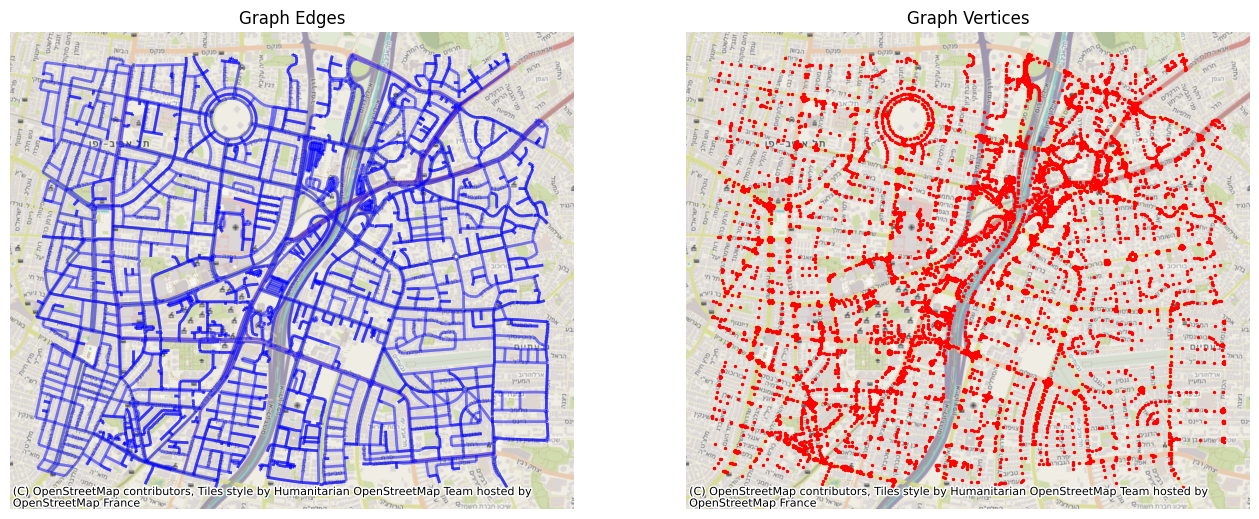

In [3]:
gdf_edges = GeoDataFrame(geometry=graph.es['geometry'], crs=Config.default_crs)
gdf_vertices = GeoDataFrame(geometry=graph.vs['geometry'], crs=Config.default_crs)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
gdf_edges.plot(ax=axes[0], linewidth=2, color='blue', alpha=0.5, label='Edges')
gdf_vertices.plot(ax=axes[1], markersize=2, color='red', label='Vertices')
cx.add_basemap(axes[0], crs=gdf_edges.crs)
cx.add_basemap(axes[1], crs=gdf_vertices.crs)
axes[0].set_title('Graph Edges')
axes[1].set_title('Graph Vertices')
axes[0].set_axis_off()
axes[1].set_axis_off()
plt.show()

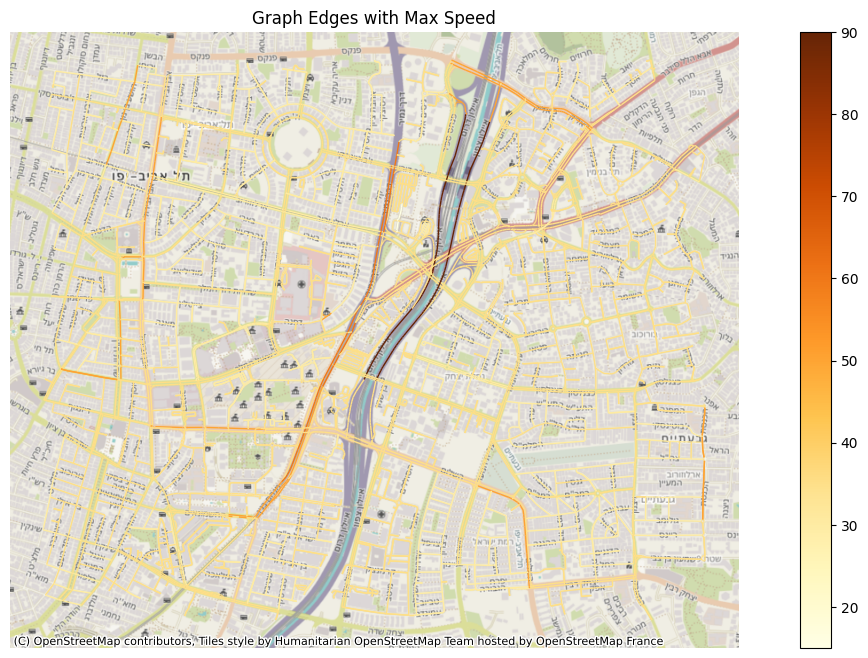

In [4]:
gdf_max_speed = GeoDataFrame(data={'max_speed': graph.es['maxspeed']}, geometry=graph.es['geometry'], crs=Config.default_crs)

fig, ax = plt.subplots(figsize=(16,8))
gdf_max_speed.plot(ax=ax, linewidth=1, column='max_speed', cmap='YlOrBr', legend=True)
cx.add_basemap(ax, crs=gdf_max_speed.crs)
plt.title('Graph Edges with Max Speed')
ax.set_axis_off()
plt.show()